<p> Anemia dataset containing attributes Gender, Hemoglobin, MCHC, MCV, MCH and Results. This dataset is used to predict if a patient is likely to suffer from anemia. Machine learning binary classifier algorithm to be used.

1. Gender: 0 - male, 1 - female

2. Hemoglobin: Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports carbon dioxide from your organs and tissues back to your lungs

3. MCH: MCH is short for "mean corpuscular hemoglobin." It's the average amount in each of your red blood cells of a protein called hemoglobin, which carries oxygen around your body.

4. MCHC: MCHC stands for mean corpuscular hemoglobin concentration. It's a measure of the average concentration of hemoglobin inside a single red blood cell.

5. MCV: MCV stands for mean corpuscular volume. An MCV blood test measures the average size of your red blood cells.

6. Results: 0- not anemic, 1-anemic
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
DATA_PATH = './datasets/anemia.csv'

In [3]:
df = pd.read_csv(DATA_PATH)

Data Cleaning: This involves identifying and correcting any errors or inconsistencies in the dataset. This includes removing missing values, correcting spelling errors, and dealing with outliers.

Feature Selection: Not all features (variables) in the dataset are important for the model. Hence, it is important to identify which features are relevant to the model and eliminate irrelevant features.

Data Transformation: This includes converting categorical variables into numerical variables (encoding), scaling numerical variables, and normalization of data.

Splitting the dataset: Splitting the dataset into training, validation, and testing sets is important to evaluate the performance of the model on unseen data.

Handling Imbalanced Data: If the dataset is imbalanced, it is important to balance it by either undersampling or oversampling techniques to avoid biased models.

Feature Engineering: Feature engineering involves creating new features from existing ones to enhance the performance of the model.

Data Visualization: This includes visualizing the data using plots and charts to understand the relationship between features and target variable, and identify outliers.

In [4]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [5]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [6]:
df.shape

(1421, 6)

<p> Data Cleaning : Data Cleaning: This involves identifying and correcting any errors or inconsistencies in the dataset. This includes removing missing values, correcting spelling errors, and dealing with outliers. </p>

In [7]:
# Checkin for missing values

df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

<AxesSubplot:xlabel='Hemoglobin'>

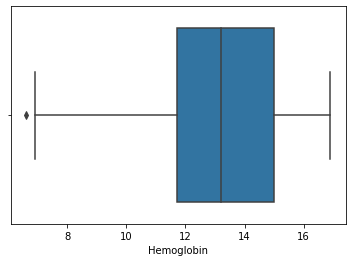

In [8]:
# Checking for outliers

sns.boxplot(x=df['Hemoglobin'])


In [9]:
Q1 = df['Hemoglobin'].quantile(0.25)
Q3 = df['Hemoglobin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(6.749999999999998, 19.950000000000003)

In [10]:
df[(df['Hemoglobin'] < lower_bound) | (df['Hemoglobin'] > upper_bound)]

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
349,0,6.6,28.7,31.0,81.6,1


In [11]:
# Removing outliers

# df = df[(df['Hemoglobin'] > lower_bound) & (df['Hemoglobin'] < upper_bound)]

In [12]:
df.shape

(1421, 6)

<AxesSubplot:xlabel='MCH'>

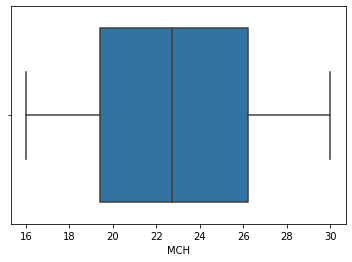

In [13]:
# Checking for outliers

sns.boxplot(x=df['MCH'])

In [14]:
Q1 = df['MCH'].quantile(0.25)
Q3 = df['MCH'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(9.199999999999998, 36.4)

In [15]:
# Removing outliers

df = df[(df['MCH'] > lower_bound) & (df['MCH'] < upper_bound)]

In [16]:
def find_outliers(df_, col):
    Q1 = df_[col].quantile(0.25)
    Q3 = df_[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_[(df_[col] < lower_bound) | (df_[col] > upper_bound)]

In [17]:
find_outliers(df, 'MCH')

,Gender,Hemoglobin,MCH,MCHC,MCV,Result


In [18]:
find_outliers(df, 'MCHC')

,Gender,Hemoglobin,MCH,MCHC,MCV,Result


In [19]:
find_outliers(df, 'MCV')

,Gender,Hemoglobin,MCH,MCHC,MCV,Result


In [20]:
find_outliers(df, 'Hemoglobin')

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
349,0,6.6,28.7,31.0,81.6,1


In [21]:
find_outliers(df, 'Gender')

,Gender,Hemoglobin,MCH,MCHC,MCV,Result


In [22]:
# removing outliers

df_outliers = find_outliers(df, 'Hemoglobin')

In [23]:
df = df.drop(df_outliers.index)

In [24]:
df.shape

(1420, 6)

In [25]:
# Checking for Catagorical data

df['Gender'].value_counts()

1    740
0    680
Name: Gender, dtype: int64

In [26]:
# Checking for Duplicate data

df.duplicated().sum()

887

In [27]:
# Removing Duplicate data

df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(533, 6)

<p>
Feature Selection: Not all features (variables) in the dataset are important for the model. Hence, it is important to identify which features are relevant to the model and eliminate irrelevant features.
</p>

In [30]:
corr_matrix = df.corr()

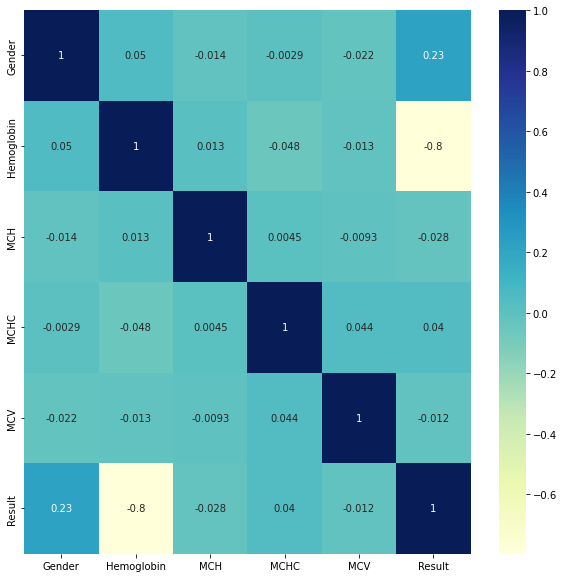

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [32]:
# threshold value for the correlation coefficient
threshold = 0.8

# Find the highly correlated pairs of features
corr_pairs = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            corr_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))

# highly correlated pairs of features
print(corr_pairs)

set()


In [33]:
# Feature importance ranking

from sklearn.ensemble import RandomForestClassifier

X = df.drop('Result', axis=1)
y = df['Result']

# Create a random forest classifier
model = RandomForestClassifier()

# Train the classifier
model.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(df.columns, model.feature_importances_):
    print(feature)



('Gender', 0.09120361765677192)
('Hemoglobin', 0.8224566825017345)
('MCH', 0.029298483860777103)
('MCHC', 0.022718978435745704)
('MCV', 0.03432223754497066)


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)

# Transform the dataset to the new feature space
X_new = pca.transform(X)

In [35]:
X_new.shape == (df.shape[0],5)

True

Data Transformation: This includes converting categorical variables into numerical variables (encoding), scaling numerical variables, and normalization of data.

In [36]:
# Check if there is a need to scale the data

df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,0.523452,13.299625,22.901126,30.248030,85.654597,0.461538
std,0.499919,2.047757,3.944202,1.413263,9.612353,0.498987
min,0.000000,6.900000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.600000,19.500000,29.000000,77.300000,0.000000
50%,1.000000,13.100000,22.700000,30.400000,85.600000,0.000000
75%,1.000000,15.000000,26.100000,31.500000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


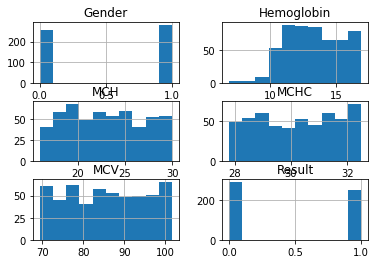

In [37]:
df.hist()
plt.show()

<Figure size 720x720 with 0 Axes>

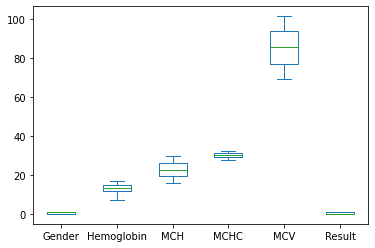

In [38]:
plt.figure(figsize=(10, 10))
df.plot(kind='box')
plt.show()

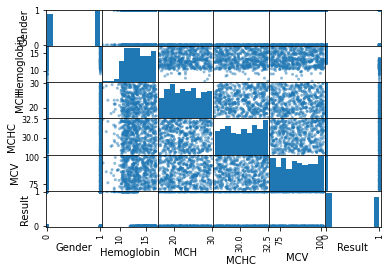

In [39]:
pd.plotting.scatter_matrix(df, diagonal='hist')
plt.show()

Splitting the dataset: Splitting the dataset into training, validation, and testing sets is important to evaluate the performance of the model on unseen data.

In [40]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [41]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((319, 5), (107, 5), (107, 5), (319,), (107,), (107,))

Handling Imbalanced Data: If the dataset is imbalanced, it is important to balance it by either undersampling or oversampling techniques to avoid biased models.

In [42]:
# Cheking for class imbalance

y_train.value_counts()

0    167
1    152
Name: Result, dtype: int64

Feature Engineering: Feature engineering involves creating new features from existing ones to enhance the performance of the model.

In [43]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [44]:
df.shape

(533, 6)

Data Visualization: This includes visualizing the data using plots and charts to understand the relationship between features and target variable, and identify outliers.

Scatter plots - used to visualize the relationship between two variables, such as the correlation between features.

Line plots - used to visualize the trend or progression of a variable over time.

Histograms - used to visualize the distribution of a variable.

Box plots - used to visualize the distribution of a variable and identify outliers.

Heat maps - used to visualize the correlation between multiple variables.

Pair plots - used to visualize the correlation between multiple pairs of variables.

Bar plots - used to compare the frequency or distribution of categorical variables.

Violin plots - used to visualize the distribution of a variable and compare it across multiple categories.

Area plots - used to visualize the composition of multiple variables over time.

Bubble charts - used to visualize the relationship between three variables, such as the correlation between two features and a target variable.

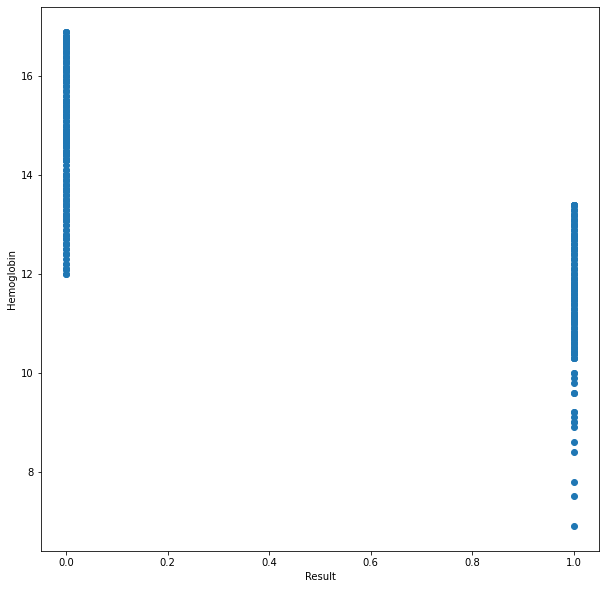

In [47]:
# Scatter plot of the data

plt.figure(figsize=(10, 10))
plt.scatter(df['Result'],df['Hemoglobin'])
plt.xlabel('Result')
plt.ylabel('Hemoglobin')
plt.show()

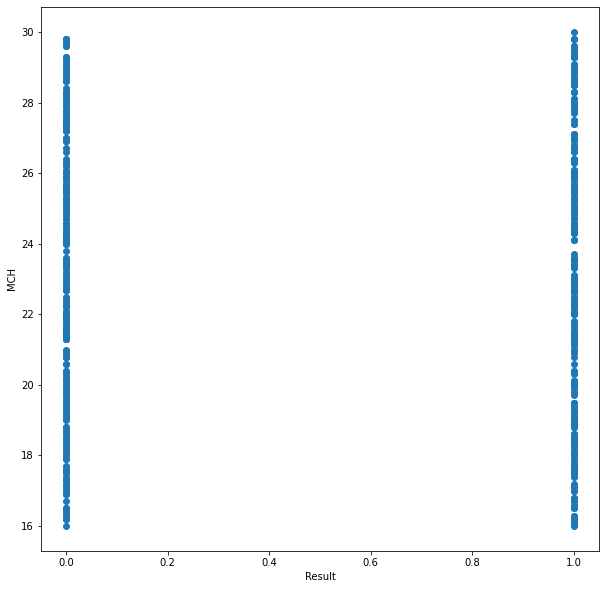

In [49]:
plt.figure(figsize=(10, 10))
plt.scatter(df['Result'], df['MCH'])
plt.xlabel('Result')
plt.ylabel('MCH')
plt.show()

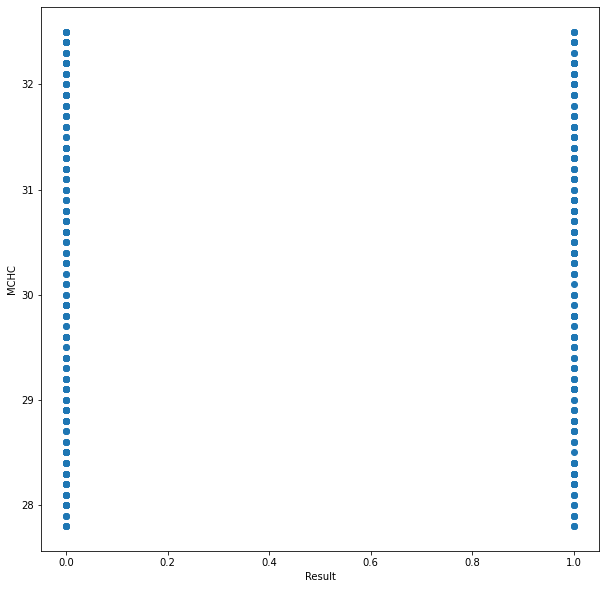

In [50]:
plt.figure(figsize=(10, 10))
plt.scatter(df['Result'], df['MCHC'])
plt.xlabel('Result')
plt.ylabel('MCHC')
plt.show()

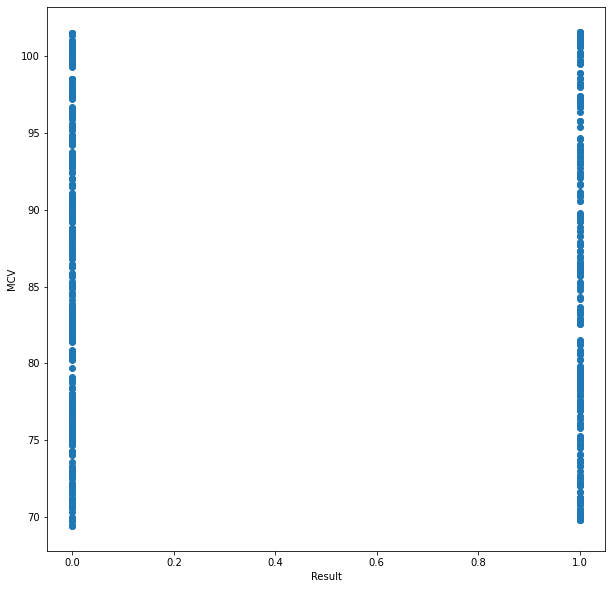

In [51]:
plt.figure(figsize=(10, 10))
plt.scatter(df['Result'], df['MCV'])
plt.xlabel('Result')
plt.ylabel('MCV')
plt.show()

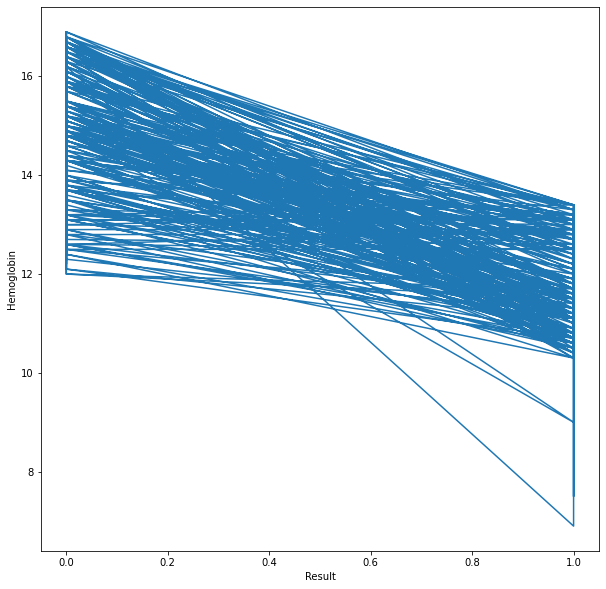

In [53]:
# Line plot of the data

plt.figure(figsize=(10, 10))
plt.plot(df['Result'], df['Hemoglobin'])
plt.xlabel('Result')
plt.ylabel('Hemoglobin')
plt.show()

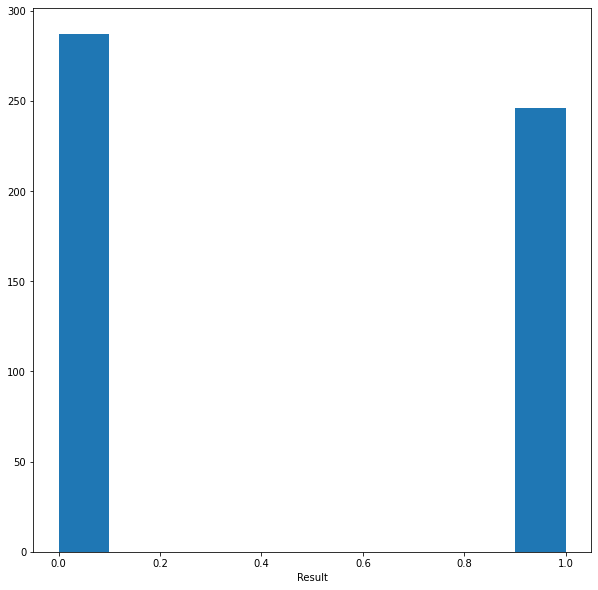

In [56]:
# Histogram of the data

plt.figure(figsize=(10, 10))
plt.hist(df['Result'])
plt.xlabel('Result')
plt.show()

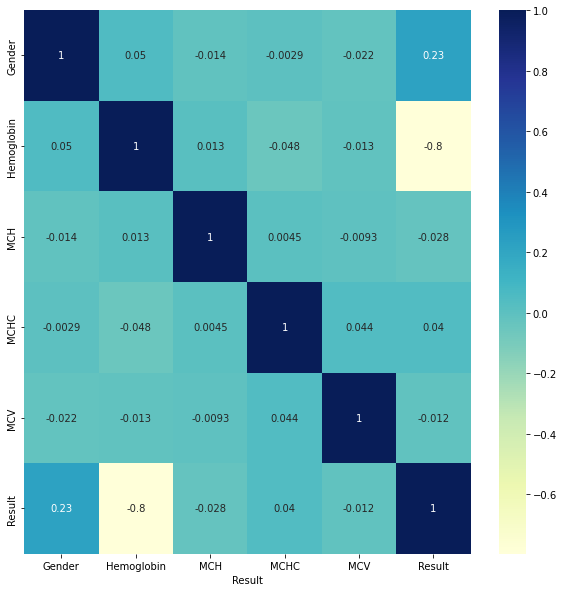

In [58]:
# Heat maps of the data

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.xlabel('Result')
plt.show()

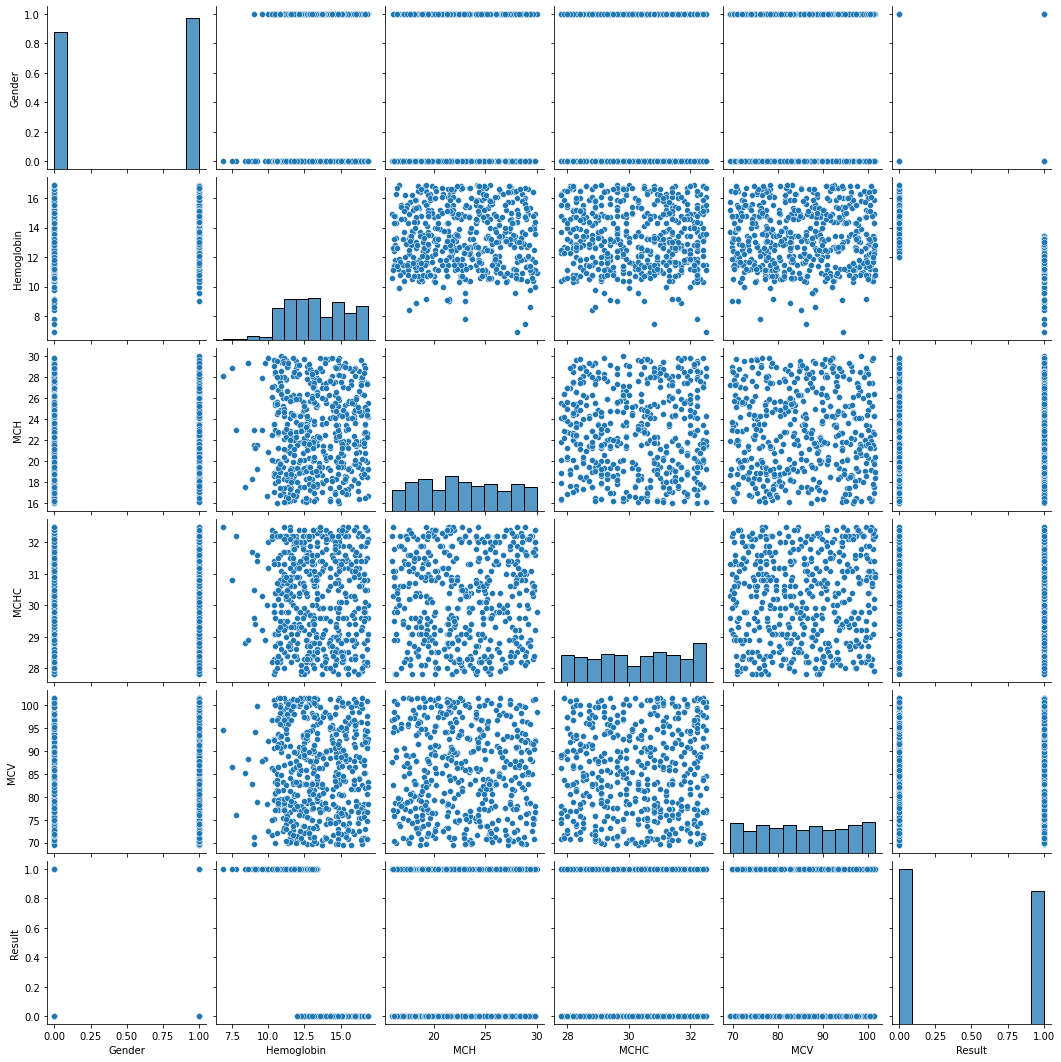

In [59]:
# Pair plots of the data

sns.pairplot(df)
plt.show()


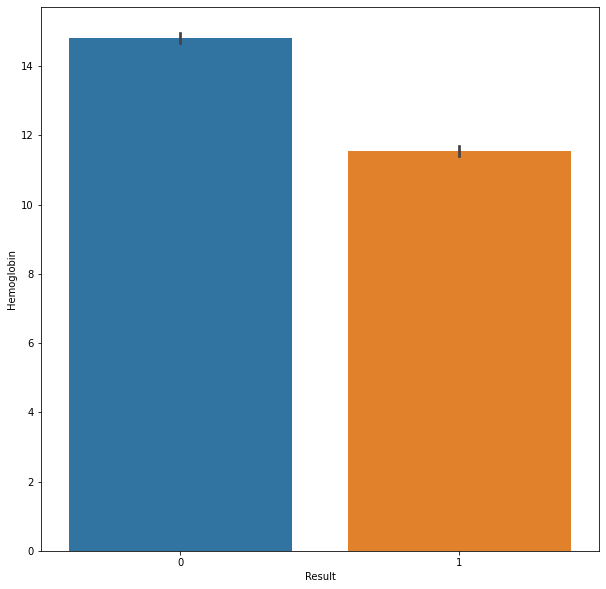

In [60]:
# Bar plots of the data

plt.figure(figsize=(10, 10))
sns.barplot(x=df['Result'], y=df['Hemoglobin'])
plt.xlabel('Result')
plt.ylabel('Hemoglobin')
plt.show()

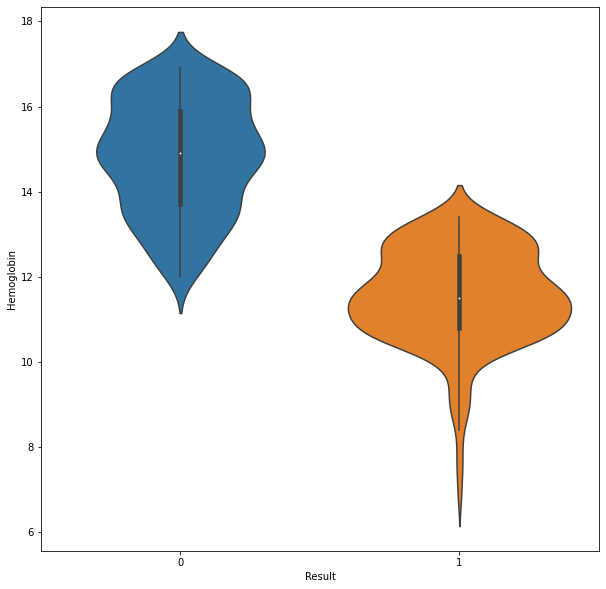

In [61]:
# Violin plots of the data

plt.figure(figsize=(10, 10))
sns.violinplot(x=df['Result'], y=df['Hemoglobin'])
plt.xlabel('Result')
plt.ylabel('Hemoglobin')
plt.show()

<Figure size 720x720 with 0 Axes>

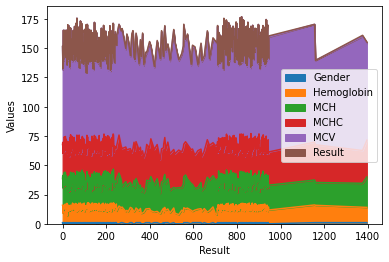

In [63]:
# Area plots of the data

plt.figure(figsize=(10, 10))
df.plot(kind='area')
plt.xlabel('Result')
plt.ylabel('Values')
plt.show()

In [67]:
# Bubble charts of the data
import plotly.express as px

fig = px.scatter(df, x="Result", y="Hemoglobin", size="MCH", color="MCHC",
              hover_name="MCV", log_x=True, size_max=60)
fig.show()

Applying Machine Learning Models

Logistic Regression - a binary classification algorithm that models the probability of the input data point belonging to one of the two classes.

K-Nearest Neighbors - a non-parametric algorithm that classifies a data point based on the class of its nearest neighbors in the feature space.

Decision Trees - a hierarchical structure that classifies a data point based on a sequence of binary decisions on the feature values.

Random Forest - an ensemble algorithm that combines multiple decision trees to improve classification accuracy.

Support Vector Machines (SVMs) - a binary classification algorithm that finds the optimal hyperplane separating the two classes in the feature space.

Naive Bayes - a probabilistic algorithm that models the joint probability distribution of the feature vectors and class labels using the Bayes rule.

Neural Networks - a family of algorithms that use a layered network of artificial neurons to model complex non-linear relationships between the input features and the class labels.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_and_evaluate(model, X, y):
    """
    Trains the given model on the input data and evaluates its accuracy.
    
    Args:
    - model: the machine learning model to be trained
    - X: the input features (a pandas DataFrame or numpy array)
    - y: the target labels (a pandas Series or numpy array)
    
    Returns:
    - the accuracy score of the trained model on the test data
    """
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict the target labels on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy score
    print(f"Accuracy: {accuracy}")
    
    return accuracy

In [69]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9626168224299065


0.9626168224299065

In [70]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
model = KNeighborsClassifier()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.794392523364486


c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



0.794392523364486

In [71]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
model = DecisionTreeClassifier()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

In [72]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
model = RandomForestClassifier()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

In [73]:
# Support Vector Machine
from sklearn.svm import SVC

# Create a support vector machine model
model = SVC()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.8411214953271028


0.8411214953271028

In [74]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create a naive bayes model
model = GaussianNB()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9252336448598131


0.9252336448598131

In [75]:
# Neural Network
from sklearn.neural_network import MLPClassifier

# Create a neural network model
model = MLPClassifier()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9252336448598131


c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.9252336448598131

Decision Tree Gives the better accuracy

In [76]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
model = DecisionTreeClassifier()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

In [81]:
from sklearn.model_selection import GridSearchCV

# Create a decision tree model
model = DecisionTreeClassifier()

# Create a dictionary of hyperparameters to search
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Create a grid search object
grid = GridSearchCV(model, params, cv=5, verbose=1, n_jobs=-1)
grid.fit(X, y)

grid.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [79]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

In [83]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
model = RandomForestClassifier()

# Create a dictionary of hyperparameters to search
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Create a grid search object
grid = GridSearchCV(model, params, cv=5, verbose=1, n_jobs=-1)

# Train and evaluate the model
grid.fit(X, y)

grid.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [84]:
model = RandomForestClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

In [85]:
# Using Ensemble Learning to Improve the Accuracy of the Decision Tree Model

from sklearn.ensemble import VotingClassifier

# Create a decision tree model
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Create a random forest model
rf = RandomForestClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Create a voting classifier
model = VotingClassifier(estimators=[('dt', dt), ('rf', rf)], voting='hard')

# Train and evaluate the model
train_and_evaluate(model, X, y)


Accuracy: 0.9813084112149533


0.9813084112149533

In [92]:
# Using Gradient Boosting to Improve the Accuracy of the Decision Tree Model

from sklearn.ensemble import GradientBoostingClassifier

# Create a gradient boosting model
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=1, min_samples_split=2,init=dt)

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

In [93]:
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost model
model = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=0.1, random_state=42)

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



0.9813084112149533

In [94]:
# Improving the Accuracy of the Decision Tree Model Using Bagging

from sklearn.ensemble import BaggingClassifier

# Create a bagging model
model = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42)

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

In [95]:
# Creating a Stacking Ensemble

from sklearn.ensemble import StackingClassifier

# Create a stacking classifier

model = StackingClassifier(estimators=[('dt', dt), ('rf', rf)], final_estimator=rf)

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

Since The Accuracy remains same we'll use Decision Tree

In [96]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
model = DecisionTreeClassifier()

# Train and evaluate the model
train_and_evaluate(model, X, y)

Accuracy: 0.9813084112149533


0.9813084112149533

In [97]:
# Saving the Model

import pickle

# Save the model to disk
filename = 'finalized_model_animea.pkl'

# Save the model to disk
pickle.dump(model, open(filename, 'wb'))

In [100]:
to_predict = [
    1,
    14.9,
    22.7,
    29.1,
    83.7
]

In [101]:
model.predict([to_predict])

c:\Users\salman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0], dtype=int64)

In [99]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
